# Graph Matching

You work at Facebook and Twitter, but there’s been a terrible incident on the Twitter end. All Twitter users’ names and handles have been somehow been deleted! Your bosses are furious and have tasked you with somehow recovering the lost information. How might you go about doing this? Luckily, you’ve been working hard and have somehow earned yourself this dual Facebook/Twitter gig, so you have a great resource at your disposal: the Facebook social network. You know all facebook users and who they are friends with, and since you’ve only lost the twitter usernames, you can still figure out which unnamed twitter users follow each other. You decide to use the Facebook network connectivity data to re-label the twitter social network. Alternatively, you can say the we are “aligning” Twitter based on Facebook. 

In the two social networks above, each user is a node and an edge exists if two users are friends. We'll define the facebook and twitter networks as $F$ and $T$ respectively, with associated adjacency matrices $A_F$ and $A_T$. Aligning the nodes of two networks is known as *Graph Matching*, because we are matching the node indices of one network (or, *graph*) to another. This can also be thought of as a mapping; that is, based on the neighbors of a node in $F$, you find a node in $T$ with the most similar neighborhood structure, then give the two nodes the same index. In other words, one of our Twitter users will be assigned the user name of the Facebook user with the most connections in common. This is done for the whole network, with the end result being that overall the structure is best preserved.

There are a ton of ways to match the nodes of two networks. In fact, for network pairs with $n$ nodes, there are $n!$ possible mappings; for example, when $n=100$, there are more than $10^{157}$ possible matchings. So how would we go about figuring out which mapping is best without the computationally gargantuan task of checking each one? First, we need a metric that tells us how similar two networks are to each other. For graph matching, this similarity metric is defined as $f(A, B) = ||A - B||_F^2$ for unweighted adjacency matrices $A$ and $B$. This quantity is known as the squared *Frobenius norm* (hence the subscript $F$) of the difference between $A$ and $B$. In other words, $f(A, B)$ is the sum of the squared elementwise differences between $A$ and $B$, or the quantity:
\begin{align*}
    f(A, B) &= ||A - B||_F^2 = \sum_{i, j}(a_{ij} - b_{ij})^2
\end{align*}
To understand this functionally, consider the best possible case where where the two networks (here they are two triangles) are identical: $A=B$. 
<div class="math">
\[
A = 
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
B = 
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\end{array}
\right)\end{array}
\\
A-B =
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0\end{array}
\right)\end{array}
\\
||A - B||_F^2 = 0
\]
    </div>
As we seen above, the difference will be a matrix of all zeros, and taking the squared Frobenius norm will then yield $f(A,B) = 0$. This is because all of the element-wise differences $a_{ij} - b_{ij}$ are just zero, and hence both their square (and sum) will also be zero. Below we remove one edge from $B$,

<div class="math">
\[
A = 
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
B = 
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1\\
1 & 0 & 0\\
1 & 0 & 0\end{array}
\right)\end{array}
\\
A-B =
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 0 & 0\\
0 & 0 & 1\\
0 & 1 & 0\end{array}
\right)\end{array}
\\
||A - B||_F^2 = 2
\]
    </div>

then $f(A,B) = 2$. If we consider the worst possible case (every edge in $A$ does not exist in $B$), 
<div class="math">
\[
A = 
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
B = 
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0\end{array}
\right)\end{array}
\\
A-B =
\begin{array}{cc} &
\begin{array}{ccc} 0 & 1 & 2 \end{array}
\\
\begin{array}{ccc}
0 \\
1 \\
2 \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\end{array}
\right)\end{array}
\\
||A - B||_F^2 = 6
\]
    </div>
then $f(A,B) = n(n - 1) = 3\cdot 2 = 6$. In this sense, the metric effectively counts the total number of disagreements in the adjacency matrices between $A$ and $B$. Thus, we want to find the mapping where $f(A, B)$ is as small as possible.


## Graph Matching Small Networks

Say we have the network pairs below, $T$ and $F$. They have four nodes each, $\{1, 2, 3, 4\}$ for $T$, and $\{a, b, c, d\}$ for $F$. In this case, the nodes represent people within the social networks, and the edges represent whether two people are connected on the social networking site. In this case, we will assume we have a node correspondance:
1. Person $0$ on Twitter is person $a$ on Facebook,
2. Person $1$ on Twitter is person $b$ on Facebook,
3. Person $2$ on Twitter is person $c$ on Facebook,
4. Person $3$ on Twitter is person $d$ on Facebook.
The corresponding adjacency matrices of the two networks are equal to each other when the nodes are laid out for $A_T$ as $\{0, 1, 2, 3\}$, and when the nodes are laid out for $A_F$ as $\{a,b,c,d\}$. 

![gm_11](gm_1.png)
<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
A_F = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & c & d \end{array}
\\
\begin{array}{ccc}
a \\
b \\
c \\
d \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array} \\
|A_T - A_F| = \left(
\begin{array}{ccc}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\end{array}
\right)
\]
    </div>
And as we learned above, therefore $f(A_T, A_B) = 0$. As we can see, when we compare the networks with the nodes ordered correctly (Person $1$ Twitter is the first node, Person $a$ from Facebook is its first node, Person $2$ from Twitter is the first node of $A_T$, Person $b$ from Facebook is the second node of $A_F$, so on and so forth). What we've done here by ordering the nodes in such tuples is implicitly made the statement that, there is something similar about the nodes $j$ between Twitter and Facebook, and therefore, ordering the adjacency matrices while obeying this similarity is going to give us a *low* edge disagreement (here, just zero). 

We can see this easily, by considering what happens if we reorder the nodes *simultaneously* for each network. Let's instead order the nodes for Twitter and Facebook as $\{2, 0, 1, 3\}$ and $\{c, a, b, d\}$, respectively. We will call these new adjacency matrices with the new node ordering $A_T''$ and $A_F''$ respectively:

<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 2 & 0 & 1 & 3 \end{array}
\\
\begin{array}{cccc}
2 \\
0 \\
1 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0
\end{array}
\right)\end{array}
\quad \quad
A_F = 
\begin{array}{cc} &
\begin{array}{cccc} c & a & b & d \end{array}
\\
\begin{array}{ccc}
c \\
a \\
b \\
d \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0
\end{array}
\right)\end{array} \\
|A_T - A_F| = \left(
\begin{array}{ccc}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\end{array}
\right)
\]
    </div>

The idea is that, even though the ordering of the nodes is different, we have maintained that *like goes with like*: the first node for Twitter is node $2$ and the first node for Facebook is node $c$, the second node for Twitter is $0$ and the second node for Facebook is node $a$, so on and so forth. The node orderings preserve the *correspondance* between the nodes of Twitter with the nodes of Facebook.

Unfortunately, nothing in life nor network machine learning is ever this simple. The spatial layout of a network's nodes is arbirary, and in reality it can often be much harder to tell whether two networks are the same. For graph matching, we don't actually *know* the node correspondance between the two networks: we have no idea that person $0$ on Twitter is person $a$ on Facebook, person $1$ on Twitter is person $b$ on Facebook, so on and so forth.

For instance, we can swap the spatial location of nodes $c$ and $d$ in network $F$, as shown below. Even with such a small network, it's hard to tell whether the networks are the same. 

![gm_22](gm_2.png)

Further, let's say we just had an arbitrary ordering of the nodes for Facebook, which is now a little bit different from the one which we just saw. Let's imagine we have the nodes ordered instead as $\{a, b, d, c\}$ instead of $\{a, b, c, d\}$, like we did before, but Twitter's nodes are still ordered as $\{0, 1, 2, 3\}$. Now, the adjacency matrices won't be equal either, where we use $A_F'$ to denote the adjacency matrix for the Facebook network with this new node ordering:

<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
A_F' = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & d & c \end{array}
\\
\begin{array}{ccc}
a \\
b \\
d \\
c \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\end{array}
\right)\end{array} \\
|A_T - A_F'| = \left(
\begin{array}{ccc}
0 & 0 & 1 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 0 & 0\\
1 & 1 & 0 & 0\end{array}
\right)
\]
    </div>
and we get that $f(A_T, A_F') = 8$, since there are $8$ entries which are different in the adjacency matrices between $A_T$ and $A_F$. This might seem a bit high, but note that because the network is undirected, adjecency disagreements are effectively counted twice (a single edge disagreement for an edge $(i,j)$ also yield a difference for edge $(j, i)$, since the adjacency matrix is symmetric). By comparing the nodes of Twitter and Facebook with the nodes *misaligned*, we have effectively *broken* the node correspondance between the nodes of Twitter and Facebook. 

In this sense, we can see how networks with a low number of edge disagreements might be considered to be better *matches* in terms of the node correspondance. When the nodes are *aligned* in a way which respects the node correspondance, identical networks have a low number of disagreements, and when the nodes are *aligned* in a way which disregards the node correspodance, the networks have a high number of disagreements. We will build upon this idea further, by exploring how to manipulate our adjacency matrices such that we can find alignments that match well. You can do this using something called a permutation matrix.

## Permutation Matrices

Permutation matrices are used to shuffle around the rows and columns of other matrices. A permutation matrix is a matrix of all ones and zeros, where each row and column adds up to one. In other words, each row has exactly one entry equal to one, with the rest being zeros; the same is true for the columns.


### Permutation matrices

Permutation matrices are commonly used as a method to move around the rows and columns of a square matrix. A **permutation matrix** is a matrix where, for every row and column, exactly one entry has a value of one. 

#### $P^\top B$ moves the rows

Let's consider a matrix $B$ where all entries of the first row have a value of one, all entries of the second row have a value of two, all entries of the third row have a value of three, and all entries of the fourth row have a value of four. We can apply a permutation matrix $P$ to swap the rows around with the following heuristic. If the matrix $P$ has an entry $p_{ji}$ which is one, then in the resulting matrix, the row $i$ will be the row $j$ from the matrix we permuted. 

For instance, in the following example, the values $p_{12}$, $p_{23}$, $p_{34}$, and $p_{41}$ all have values of one, which means we will reorder the rows of $B$ so that $P^\top B$ will have the top row being the second row from the original matrix (and will have a value of two), the second row will be the third row from the original matrix (and will have a value of three), the third row will be the fourth row from the original matrix (and will have a value of four), and the fourth row will be the first row from the original matrix (and will have a value of one. 

We apply this "row" permutation with the matrix multiplication $PB$:

In [1]:
import numpy as np

B = np.array([[1,1,1,1],
              [2,2,2,2],
              [3,3,3,3],
              [4,4,4,4]])

P = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0]])
# Pt * B
PtB = P.T @ B

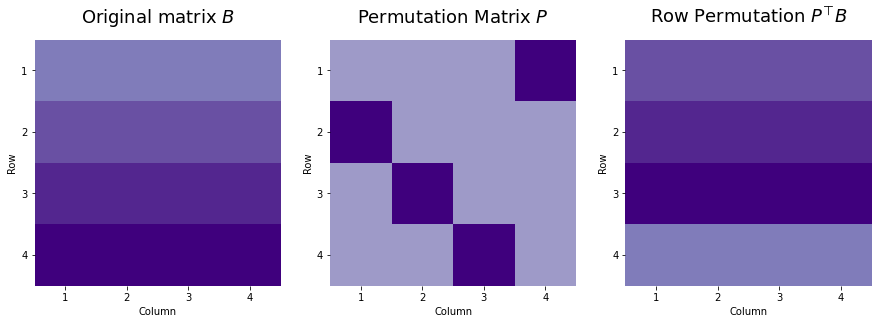

In [2]:
from graspologic.plot import heatmap
import matplotlib.pyplot as plt
from graphbook_code import cmaps
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
mtxs = [B, P, PtB]
titles = ["Original matrix $B$", "Permutation Matrix $P$", "Row Permutation $P^\\top B$"]

for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, cmap=cmaps["sequential"], title = titles[i])
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    ax.set_xticks([0.5,1.5,2.5,3.5])
    ax.set_yticks([0.5,1.5,2.5,3.5])
    ax.set_xticklabels([1,2,3,4])
    ax.set_yticklabels([1,2,3,4])

### $CP$ moves the columns

Likewise, a column permutation behaves very similarly. Let's now consider a matrix $C$, where the first column has a value of one, the second column has a value of two, the third column has a value of three, and the fourth column has a value of four. We use the same permutation matrix, where here, $p_{ji}$ indicates that column $i$ of the new matrix will be column $j$ from the matrix before the permutation was applied. We apply the column permutation matrix as $CP$:

In [3]:
C = np.array([[1,2,3,4],
              [1,2,3,4],
              [1,2,3,4],
              [1,2,3,4]])

P = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0]])
# C * P
CP = C @ P

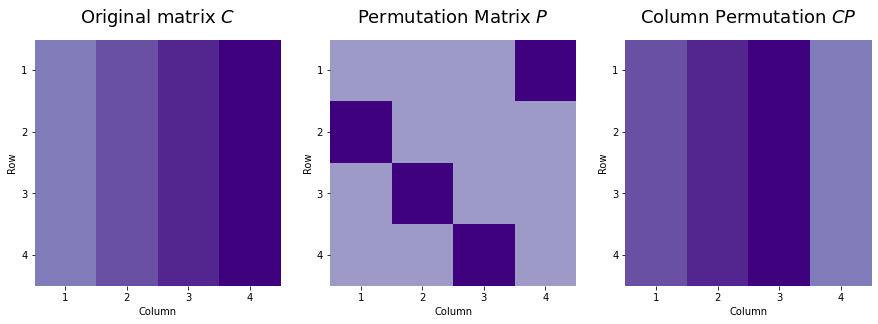

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
mtxs = [C, P, CP]
titles = ["Original matrix $C$", "Permutation Matrix $P$", r"Column Permutation $CP$"]

for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, cmap=cmaps["sequential"], title = titles[i])
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    ax.set_xticks([0.5,1.5,2.5,3.5])
    ax.set_yticks([0.5,1.5,2.5,3.5])
    ax.set_xticklabels([1,2,3,4])
    ax.set_yticklabels([1,2,3,4])

### $P^\top DP$ moves the rows and columns concurrently

As an interesting property of permutation matrices, we can apply these operations sequentially to reorder both the rows *and* columns of a matrix. Consider, for instance, a permutation matrix where row/column $1$ of the original matrix becomes row/column $2$ of the new matrix, and likewise, row/column $2$ of the original matrix becomes row/column $1$ of the new matrix. We'll consider a matrix $D$ where the first row and first column both have entries of all ones, and the rest of the matrix has the value zero. The original matrix and the permutation matrix look like this:

In [5]:
D = np.array([[1,1,1,1],
              [1,0,0,0],
              [1,0,0,0],
              [1,0,0,0]])

P = np.array([[0,1,0,0],
              [1,0,0,0],
              [0,0,1,0],
              [0,0,0,1]])

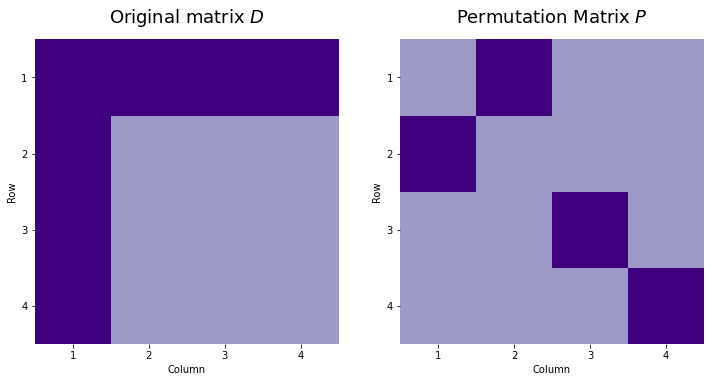

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
mtxs = [D, P]
titles = ["Original matrix $D$", "Permutation Matrix $P$"]

for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, cmap=cmaps["sequential"], title = titles[i])
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    ax.set_xticks([0.5,1.5,2.5,3.5])
    ax.set_yticks([0.5,1.5,2.5,3.5])
    ax.set_xticklabels([1,2,3,4])
    ax.set_yticklabels([1,2,3,4])

So, looking at the permutation matrix, if we were to apply this as a row or column permutation, row/column 3 and 4 will stay the same ($p_{33} = 1$ and $p_{44} = 1$, so row/column $3$ and $4$ will become row/column $3$ and $4$ respectively in the new representations), and row/column $1$ and $2$ would swap (row/column $1$ would become row/column $2$, and vice versa). Let's see what happens when we apply these sequentially:

In [7]:
PtD = P.T @ D
PtDP = PtD @ P

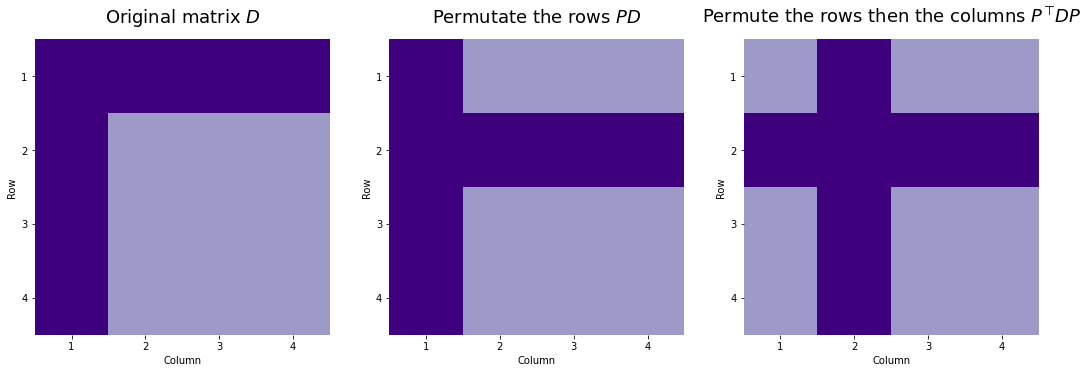

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 14))
mtxs = [D, PtD, PtDP]
titles = ["Original matrix $D$", "Permutate the rows $PD$", r"Permute the rows then the columns $P^\top DP$"]

for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, cmap=cmaps["sequential"], title = titles[i])
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    ax.set_xticks([0.5,1.5,2.5,3.5])
    ax.set_yticks([0.5,1.5,2.5,3.5])
    ax.set_xticklabels([1,2,3,4])
    ax.set_yticklabels([1,2,3,4])

So, we take the original matrix, and first begin by swapping rows $1$ and $2$ to give us $PD$. Next, using this row-permuted matrix, we then permute the columns by swapping columns $1$ and $2$ of $P^\top D$, to give us $P^\top DP$. This shows that by using a permutation matrix to row and then column swap, we can reorder the rows and columns of $D$ simultaneously.

### Using concurrent row and column permutations on adjacency matrices

For our networks, remember that the adjacency matrix is the matrix $A$ where the entry $a_{ij}$ represents whether or not there is an edge between nodes $i$ and $j$. The key aspect is that the indexing for the adjacency matrix, $ij$, is an indexing over a single set: the nodes. This means that if we want to *reorder* the adjacency matrix by moving around the nodes, we need to move both the rows *and* the columns concurrently, since the *node ordering* is what is being permuted. If we had a permutation of the nodes given by $P$, we would correspondingly reorder the adjacency matrix by permuting the rows *and* columns of $A$ by using $P^\top AP$.


```{admonition} Permutation Matrices are unshuffled by their transpose

Let's suppose that we have a permutation matrix, $P$. We remember from above that a permutation matrix is a matrix where every row and every column has a *single* entry which takes a value of one. Let's assume that $p_{ji} = 1$, which means that if we were to use the permutation as a row permutation, we would "flip" rows $i$ and $j$, or if we were to use it as a column permutation, we would "flip" columns $i$ and $j$. If we were to use it for both a row and column permutation, we would flip rows/columns $i$ and $j$. How do we "undo" this operation?

What happens when we take the product $P^\top P$? If for any pair of indices $p_{ji} = 1$, then $(P^\top)_{ij}$, the $(i, j)$ entry of the transpose, is also one. This is just the definition of the matrix transpose operation. What does the matrix product of $P^\top$ and $P$ look like? Writing out the matrix multiplication, we see:
\begin{align*}
    P^\top P &= \begin{bmatrix}
    (P^\top)_{11} & ... & (P^\top)_{1n} \\
    \vdots & \ddots & \vdots \\
    (P^\top)_{n1} & ... & (P^\top)_{nn}
    \end{bmatrix}\begin{bmatrix}
    p_{11} & ... & p_{1n} \\
    \vdots & \ddots & \vdots \\
    p_{n1} & ... & p_{nn}
    \end{bmatrix}.
\end{align*}
When we use the definition of the trampsose, this becomes:
\begin{align*}    P^\top P &= \begin{bmatrix}
    p_{11}& ... & p_{n1}\\
    \vdots & \ddots & \vdots \\
    p_{1n} & ... & p_{nn}
    \end{bmatrix}\begin{bmatrix}
    p_{11} & ... & p_{1n} \\
    \vdots & \ddots & \vdots \\
    p_{n1} & ... & p_{nn}
    \end{bmatrix}.
\end{align*}
The resulting matrix $P^\top P$ has entries $i, j$ where:
\begin{align*}
(P^\top P)_{ij} = \sum_{k = 1}^n p_{ik}p_{jk}
\end{align*}
But, as we know, for a particular row $i$ and column $k$, exactly a *single* entry has a value of $1$. This means that for any $i \neq j$, that $p_{ik}p_{jk}$ will *always* be equal to zero, because you could not have two rows of the same column $k$ both taking the value of $1$ concurrently.

If $i = j$, then there must be some $k$ where $p_{ik} = 1$, because at least $1$ entry of the columns of $P$ must be $1$ by definition.

Therefore, $(P^\top P)_{ij} = 1$ if $i = j$, and $(P^\top P)_{ij} = 0$ everywhere else. This is the definition of the identity matrix, so $P^\top P = I$. Since the transpose of the identity matrix is also the identity matrix, $PP^\top = I$, too.

This has the interpretation that if we permute an adjacency matrix's rows and columns $A$ with a permutation matrix $P$, giving us $B = P^\top A P$, that we can "undo" this permutation by taking $PBP^\top$. We can see this by just looking at it, and plugging in the definition of $B$:
\begin{align*}
    PBP^\top &= P\left(P^\top A P\right)P^\top, \\
    &= PP^\top A PP^\top, \\
    &= I A I = I
\end{align*}
where  used the fact that $PP^\top = I$.

In this sense, if think of $P^\top A P$ being the row/column permuted adjacency matrix of $A$, then permuting it *again* with $P^\top$ instead of $P$ will undo the permutation.
```

### Permutation Matrices to Match Network

Next, we again consider the previous simple network example from Twitter and Facebook networks. Remember that we had two networks, where there was a node correspondance in that person $0$ from Twitter was the same as person $a$ from Facebook, person $1$ from Twitter was the same as the person $b$ from Facebook, so on and so forth. 

We will suppose that the ordering of the nodes from Twitter are given to us in order, $\{0, 1, 2, 3\}$, so in the ideal case, if the nodes from Facebook respect the node correspondance and the nodes are ordered $\{a, b, c, d\}$, we have that:


![gm_11](gm_1.png)
<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
A_F = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & c & d \end{array}
\\
\begin{array}{ccc}
a \\
b \\
c \\
d \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array} \\
|A_T - A_F| = \left(
\begin{array}{ccc}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\end{array}
\right)
\]
    </div>
and $f(A_T, A_F) = 0$.

However, if you remember, the problem was that we were *instead* given the nodes from Facebook in a different order; we were given the node ordering $\{a, b, d, c\}$ with adjacency matrix $A_F'$, leading to:

<div class="math">
\[
A_T = 
\begin{array}{cc} &
\begin{array}{cccc} 0 & 1 & 2 & 3 \end{array}
\\
\begin{array}{cccc}
0 \\
1 \\
2 \\
3 \end{array}
&
\left(
\begin{array}{cccc}
0 & 1 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1\\
0 & 1 & 1 & 0\end{array}
\right)\end{array}
\quad \quad
A_F' = 
\begin{array}{cc} &
\begin{array}{cccc} a & b & d & c \end{array}
\\
\begin{array}{ccc}
a \\
b \\
d \\
c \end{array}
&
\left(
\begin{array}{ccc}
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & 1 & 0\end{array}
\right)\end{array} \\
|A_T - A_F'| = \left(
\begin{array}{ccc}
0 & 0 & 1 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 0 & 0\\
1 & 1 & 0 & 0\end{array}
\right)
\]
    </div>
    
and $f(A_T, A_F') = 8$. What we want to do is construct a permutation matrix $P$, which will keep nodes $a$ and $b$ in the same order, but swap nodes $c$ and $d$ in the node ordering. We can do this using exactly the strategy we developed above:

In [10]:
AT = np.array([[0,1,1,0],
              [1,0,0,1],
              [1,0,0,1],
              [0,1,1,0]])
AFp = np.array([[0,1,0,1],
              [1,0,1,0],
              [0,1,0,1],
              [1,0,1,0]])

P = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,1,0]])

PtAFpP = P.T @ AFp @ P

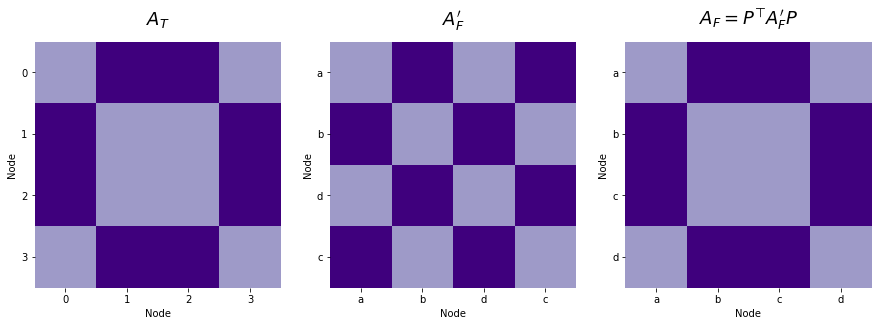

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

mtxs = [AT, AFp, PtAFpP]
titles = ["$A_T$", r"$A_F'$", r"$A_F = P^\top A_F' P$"]

node_odx = [[0,1,2,3], ["a", "b", "d", "c"], ["a", "b", "c", "d"]]

for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])
    ax.set_xlabel("Node")
    ax.set_ylabel("Node")
    ax.set_xticks([0.5,1.5,2.5,3.5])
    ax.set_yticks([0.5,1.5,2.5,3.5])
    ax.set_xticklabels(node_odx[i])
    ax.set_yticklabels(node_odx[i])

As shown in the code block above, using a properly chosen permutation matrix $P$, we are able to recover the node correspondance between the networks for Twitter and Facebook. We obtain that for this particular choice of $P$, that $f(A_T, P^\top A_F'P) = 0$.

In this way, we will use this intuition to formulate the graph matching problem. For any two adjacency matrices $A, B$, we seek to minimize the cost function $g(A,B,P) = || A - P^\top BP||_F^2$ with the restriction that $P$ is a permuation matrix. You will notice that this is the definition of the Frobenius norm of the difference between $A$ and $B$, where you have now expanded $f$ to the function $g$ which includes a permutation of the rows and columns of $B$. This means that you want to figure out a way in which you can shuffle the rows and columns of $B$, such that it is as close as possible to $A$. In mathematics, the process of minimizing (or maximizing) a function based on a set of restrictions (called *constraints*) is known as *optimization*.

#### Generating a random permutation matrix

Let's get started with getting down in the weeds coding by making ourselves a function which creates permutation matrices. Remember that for a permutation matrix, the entry $p_{ji}$ corresponds to a swap of rows/columns $i$ and $j$, depending on whether it is a row or column permutation (or being used for both). The code looks like this, and we'll explain in the comments what's going on:

In [13]:
def make_permutation(n):
    """
    A function that generates a permutation for n elements.
    """
    # the initial row/column of what is going to be permuted.
    seed_indices = np.arange(n)
    # the "permuted" row/column that the corresponding seed will 
    # end up at
    dest_indices = np.random.permutation(n)
    # initialize permutation matrix
    P = np.zeros((n,n))
    # and fill in accordingly
    P[dest_indices, seed_indices] = 1
    return P

## Finding a good permutation with gradient descent optimization

The algorithm used for solving graph matching optimization problem we described above is a variation of gradient descent.  The specifics of the algorithm are beyond the scope of this book, but for now you can simply imagine it as gradient descent. A gradient can be thought of as a vector valued slope; it is simply the slope of a function in all of it's dimensions, at a single point in space. Gradient Descent is a very common optimization method using to find optimal solutions for a wide range of problems. 

A simple way to think of the method is gravity.  Consider an inspector using a golf ball to find the lowest point when installing a drain. The ball rolls down hill until it comes to a stop; once it stops, we know we've found the lowest point. Gradient descent works in a similar way, taking steps in the direction of the local gradient with respect to some parameter. Once the gradient is zero, a local minimum has been found and the algorithm is stopped.

The main steps of a gradient descent method are choosing a suitable initial position (can be chosen randomly), then gradually improving the cost function one step at a time, until the function is changing by a very small amount, converging to a minimum. The main issue with gradient descent is that it does not guarantee that you will find a global minimum, only that you will find the local minimum of your initial position.

![grad_desc](grad_desc.png)

The image above is a simplification in two dimensions; the network functions we optimize over are n dimensional when matching networks with n nodes, making the problem incredibly difficult to solve. For this reason (among others outside of the scope of this book), the state-of-the-art graph matching algorithm is an approximation algorithm.


## Graph matching with graspologic

For the example below, we will match two networks with a known node mapping that preserves a common network structure. To do this, we simulate a single Erdos-Reyni network, $A$, with six nodes and an edge probability of 0.5. Then, we generate $B$ by randomly permuting the node labels of $A$. 

In [34]:
from graspologic.simulations import er_np

n = 6
p = 0.5

np.random.seed(1234)
A = er_np(n=n, p=p)
# make a permutation matrix
P = make_permutation(n)
B = P.T @ A @ P
disagreements = np.linalg.norm(A - B)**2

Number of adjecnecy disagreements: 11


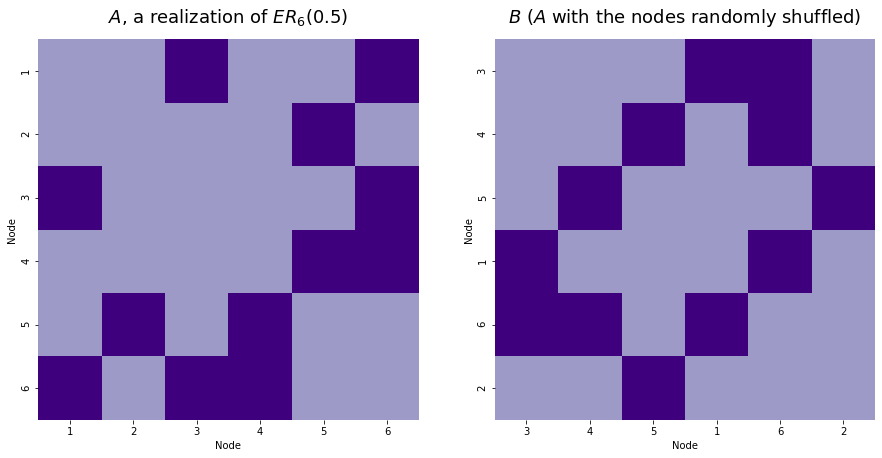

In [35]:
print("Number of adjecnecy disagreements: {:d}".format(int(disagreements)))

titles=['$A$, a realization of $ER_6(0.5)$', '$B$ ($A$ with the nodes randomly shuffled)']
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
nodeAnames = np.array([i for i in range(1, n+1)])
nodenames = [list(nodeAnames), list((P.T @ nodeAnames).astype(int))]
mtxs = [A, B]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, xticklabels=nodenames[i], cmap=cmaps["sequential"],
            yticklabels=nodenames[i], title=titles[i])
    ax.set_xlabel("Node")
    ax.set_ylabel("Node")

Below, we create a model to solve the Graph Matching Problem using the `GraphMatch` class. The model is then fit for the two networks A and B.

In [36]:
from graspologic.match import GraphMatch

gmp = GraphMatch()
gmp = gmp.fit(A,B)

Next, we can "unshuffle" the matrix by using the `gmp.perm_inds_` attribute to generate an "unshuffling" permutation matrix:

In [37]:
def make_unshuffle(dest_indices):
    """
    A function which creates a permutation matrix from a given permutation of the nodes.
    The logic is a little weird here, which is because gmp.perm_inds_ indicates the destination
    for each element i of B, and not A. 
    """
    n = len(dest_indices)
    P = np.zeros((n, n))
    # the seeds this time are the ordering of nodes from 1:n in B
    seed_indices = np.arange(n)
    # permute the shuffled indices of B to the destination specified
    # by the GMP
    P[dest_indices, seed_indices] = 1
    return P

P_unshuffle = make_unshuffle(gmp.perm_inds_)

B_unshuffle = P_unshuffle.T @ B @ P_unshuffle
disagreements_after = np.linalg.norm(A - B_unshuffle)**2

Number of adjacency disagreements: 0


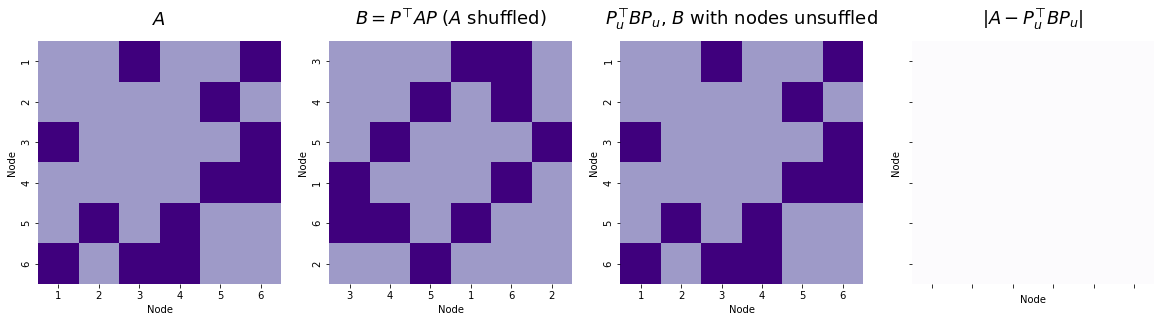

In [38]:
print("Number of adjacency disagreements: {:d}".format(int(disagreements_after)))


titles = ["$A$", "$B = P^\\top A P$ ($A$ shuffled)", "$P_u^\\top BP_u$, $B$ with nodes unsuffled", "$|A - P_u^\\top BP_u|$"]
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
nodenames = [list(nodeAnames), list((P.T @ nodeAnames).astype(int)), 
             list((P_unshuffle.T @ P.T @ nodeAnames).astype(int)), ["" for i in nodeAnames]]
mtxs = [A, B, B_unshuffle, np.abs(A - B_unshuffle)]

for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, xticklabels=nodenames[i],
            cmap=cmaps["sequential"], yticklabels=nodenames[i], 
            title=titles[i])
    ax.set_xlabel("Node")
    ax.set_ylabel("Node")

The graph matching algorithm is able to successfully unshuffle $B$, with zero adjacency disagreements between $A$ and the matched $B$, using the unshuffling matrix $P_u$. 

In this case, since $P$ was the forward permutation and recovered the correct unshuffling of $B$ back to $A$, $P = P_u^\top$. This is because of the fact we learned in the admonition above.

#### The match ratio of nodes

We can evaluate the quality of an unshuffling using another metric, the *match ratio*. The **match ratio** is the ratio of nodes which are correctly matched. We can do this since in our simulation, we know where the nodes of $A^{(2), s}$ *should* be unpermuted to. This is because by the admonition you might have read above, you know that for a permutation $P$, the corresponding un-permutation is $P^\top$, and therefore, $PP^\top = I$, the identity matrix. By a similar argument to the one we gave there, if $P_u$ is the unshuffling of a permutation matrix $P$, then if the permutation is *correct*, $PP_u$ should also be the identity matrix. Every node which is incorrectly matched will correspond to an entry of $0$ along the diagonal of $PP_u$ (or equivalently, $P_uP$). Therefore, we can just take the match ratio to be the fraction of times the diagonal of $P_uP$ of $PP_u$ is $1$:
\begin{align*}
    \text{match ratio}(P, P_u) = \frac{1}{n} \sum_{i = 1}^n \mathbb I\left\{(PP_u)_{ii} = 1\right\}
\end{align*}
where $P$ is a permutation matrix and $P_u$ is a *proposed* unshuffling matrix. The fancy looking function $\mathbb I\{x\}$ is just a counter for the number of times that the thing inside the curly braces is true. So, here, it just has a value of $1$ if $(PP_u^\top)_{ii} = 1$, and a value of $0$ if $(PP_u^\top)_{ii} \neq 1$. We write a simple utility to do this, and then can call it on our permutation and un-shuffling matrix to see that the match ratio is $1$ here (we perfectly unshuffled $B$):

In [39]:
def match_ratio(P, Pu):
    n = P.shape[0]  # the number of nodes
    return (np.diag(P @ Pu) == 1).sum()/n

print("match ratio: {:.3f}".format(match_ratio(P, P_unshuffle)))

match ratio: 1.000


### Seeds

As mentioned previously, as networks become larger, they quickly become more difficult to match. One method to mitigate this difficulty is to use $\textit{seeds}$. Seeds are a subset of matches that we already know before we perform the graph matching. For example, if we are given two networks $T$ and $F$ with 300 nodes each, we might already know ten node matches between $T$ and $F$. Having this prior information greatly improves our ability to match the networks. 

## Seeded Graph Matching (SGM) on Correlated Network Pairs

To demonstrate the effectiveness of Seeded Graph Matching (`SGM`), the algorithm will be applied on a pair of correlated SBM networks (undirected, no self loops), which is a simpler adaptation of the $\rho$-correlated $RDPG$ which we learned about in [Chapter 5](#link?). Like the $\rho$-correlated $RDPG$, the idea here is that we have two normal SBMs, but for any edge in the two networks $\mathbf a_{ij}$ and $\mathbf b_{ij}$, they will be correlated with correlation $\rho$. In words, if $\rho$ is positive, then if we know that $\mathbf a_{ij}^{(1)}$ has a value of one, then we have information to suggest that $\mathbf b_{ij}$ might be one too. In this case, we will have that $\mathbf A$ and $\mathbf B$ are $\rho-SBM_n(\vec z, B)$ where the networks are highly correlated, and $\rho = 0.9$. The block matrix is:
\begin{align*}
B &= \begin{bmatrix} 
0.7 & 0.3 & 0.4\\
0.3 & 0.7 & 0.3\\
0.4 & 0.3 & 0.7
\end{bmatrix}
\end{align*}
The first $75$ nodes in the network will be from community one, the second $75$ nodes in the network will be from community two, and the third $75$ nodes in the network will be from community three:

In [40]:
from graspologic.simulations import er_corr, sbm, sbm_corr
directed = False
loops = False
n_per_block = 75
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = 0.9
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])

np.random.seed(1234)
A, B = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
disagreements = np.linalg.norm(A - B)**2

Number of adjacency disagreements: 2236


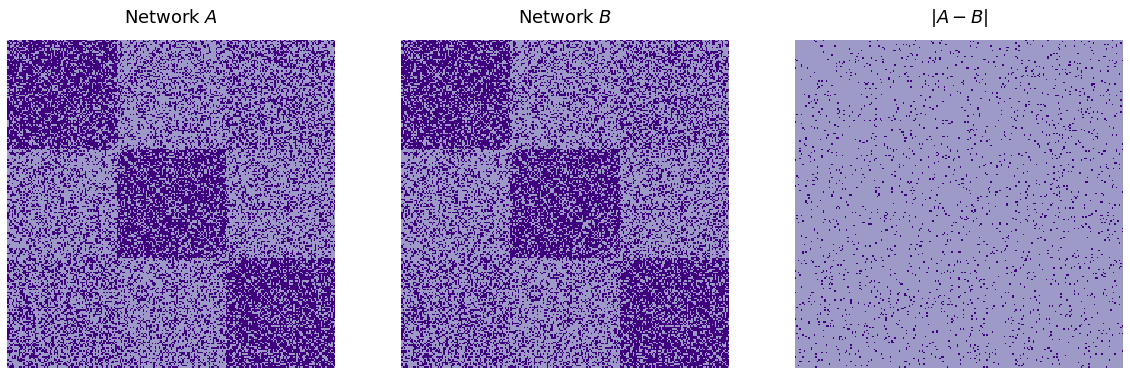

In [41]:
print("Number of adjacency disagreements: {:d}".format(int(disagreements)))
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B, np.abs(A - B)]
titles=["Network $A$", "Network $B$", "$|A - B|$"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

To emphasize the effectiveness of `SGM`, as well as why having seeds is important, we will randomly shuffle the vertices of network $B$. We will call this version of $B$ after shuffling $B_s$.

Here we see that after shuffling network $B$, there are many more edge disagreements, as expected.

In [43]:
P = make_permutation(n_verts)
# shuffle A2 which is correlated to A1
B_shuffle = P.T @ B @ P
disagreements_shuffled = np.linalg.norm(A - B_shuffle)**2

Number of adjacency disagreements: 25000


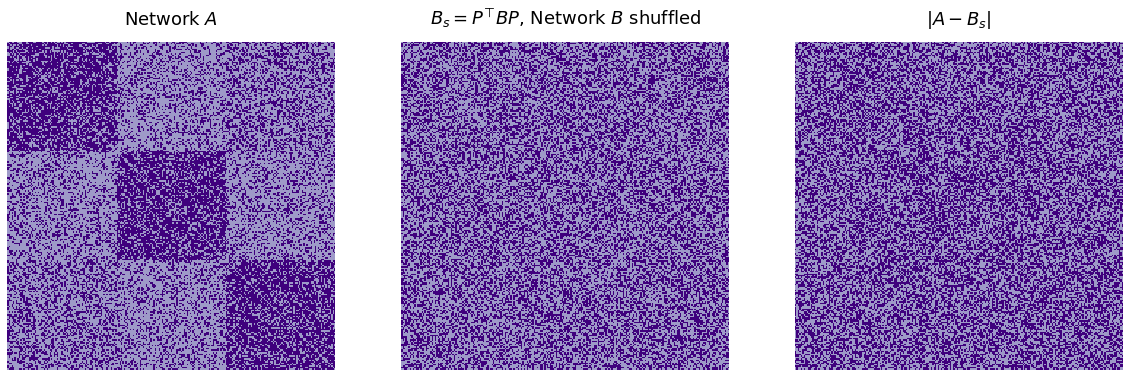

In [44]:
print("Number of adjacency disagreements: {:d}".format(int(disagreements_shuffled)))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B_shuffle, np.abs(A - B_shuffle)]
titles=["Network $A$", "$B_s = P^\\top BP$, Network $B$ shuffled", "$|A - B_s|$"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

### Unshuffling network 2 without seeds


First, we will run SGM on network $A$ and the shuffled network $B_s$ with no seeds, using a similar approach to the above.:

In [48]:
# initialize sgm
sgm = GraphMatch()
# fit with A1 and shuffled A2
sgm = sgm.fit(A, B_shuffle)
# obtain unshuffled version of the shuffled A2
P_unshuffle_noseed = make_unshuffle(sgm.perm_inds_)
B_unshuffle_noseed = P_unshuffle_noseed.T @ B_shuffle @ P_unshuffle_noseed
# compute the match ratio
match_ratio_noseed = np.count_nonzero(np.diag(P_unshuffle_noseed.T @ P))/n_verts
disagreements_noseed = np.linalg.norm(A - B_unshuffle_noseed)**2

Match Ratio, no seeds: 0.000
Disagreements, no seeds: 17720


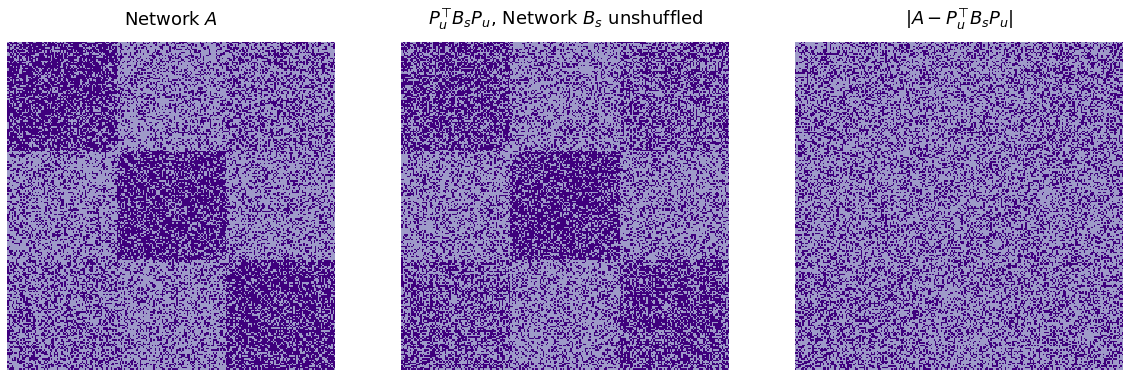

In [49]:
print("Match Ratio, no seeds: {:.3f}".format(match_ratio_noseed))
print("Disagreements, no seeds: {:d}".format(int(disagreements_noseed)))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B_unshuffle_noseed, np.abs(A - B_unshuffle_noseed)]
titles=["Network $A$", "$P_u^\\top B_s P_u$, Network $B_s$ unshuffled", "$|A - P_u^\\top B_s P_u|$"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

While the predicted unshuffling for $B$ was relatively successful in recovering the basic structure of the network $A$, we see that the number of edge disagreements between them is still quite high, and the match ratio of successfully unshuffled nodes is quite low. 

### Unshuffling network 2 with 10 seeds
Next, we will run SGM with 10 seeds randomly selected from the optimal permutation vector found ealier. Although 10 seeds is only about 4% of the 300 node network, we will observe below how much more accurate the matching will be compared to having no seeds. We add a little helper function, which takes a permutation matrix and a desired number of seeds, and indicates where the identified seed nodes would be permuted to:

In [50]:
def gen_seeds(P, n_seeds):
    """
    A function to generate n_seeds seeds for a pair of matrices A and P^TBP
    which are initially matched, but P has been applied to permute the nodes
    of B.
    """
    n = P.shape[0]
    # obtain n_seeds random seeds from 1:n
    seeds = np.random.choice(n, size=n_seeds, replace=False)
    # use the permutation matrix to find where each seed was permuted to
    seeds_permuted = [np.where(P[i, :] == 1)[0] for i in seeds]
    return seeds, seeds_permuted

In [51]:
nseeds = 10  # the number of seeds to use
# select ten nodes at random from A which will serve as seeds

# obtain seeds for nodes of A with nodes of B
ref_seeds, permuted_seeds = gen_seeds(P, nseeds)

# generate sgm instance
sgm = GraphMatch()
# run SGM with A and shuffled B, but provide the seed nodes from A as ref_seeds
# and the corresponding position of these seed nodes after shuffling as permuted_seeds
sgm = sgm.fit(A, B_shuffle, ref_seeds, permuted_seeds)
P_unshuffle_seeds = make_unshuffle(sgm.perm_inds_)

B_unshuffle_seeds = P_unshuffle_seeds.T @ B_shuffle @ P_unshuffle_seeds

match_ratio_seeds = match_ratio(P, P_unshuffle_seeds)
disagreements_seeds = np.linalg.norm(A - B_unshuffle_seeds)**2

Match Ratio with seeds: 1.000
Disagreements with seeds: 2236


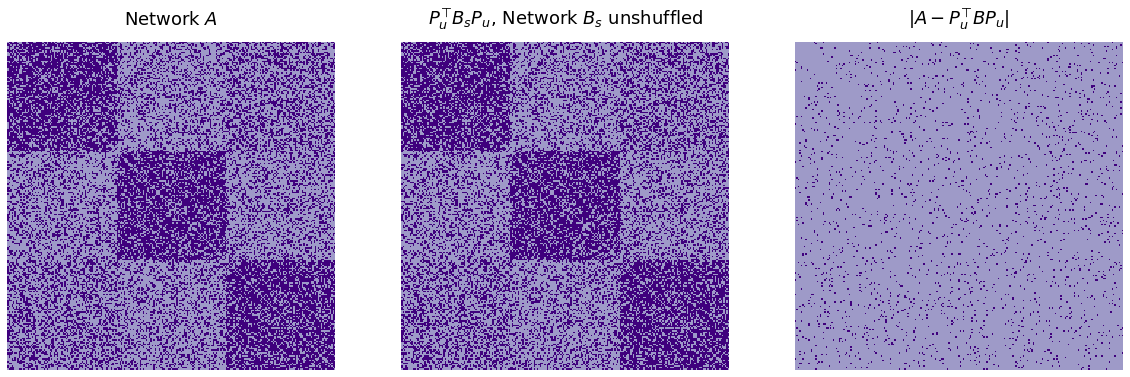

In [53]:
print("Match Ratio with seeds: {:.3f}".format(match_ratio_seeds))
print("Disagreements with seeds: {:d}".format(int(disagreements_seeds)))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B_unshuffle_seeds, np.abs(A - B_unshuffle_seeds)]
titles=["Network $A$", "$P_u^\\top B_s P_u$, Network $B_s$ unshuffled", "$|A - P_u^\\top B P_u|$"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

From the results above, we see that when running SGM on the same two networks, with no seeds there is match ratio is quite low. However including 10 seeds increases the match ratio to 100% (meaning that the shuffled $B_s$, $P^\top B P$, was completely correctly unshuffled using $P_u$).

## What happens when the number of nodes aren't the same?

From what we've seen so far, the two networks you are interested in matching nodes for must have the same number of nodes. In practice, this is a pretty restrictive limitation! You will often come across pairs of networks where many, if not all, of the nodes in the smaller network are matched to a node in the larger network. In this case, you have a dilemma: how do you match the nodes between the networks, but you don't know what to do with the extra nodes in the larger network. We will do this through a technique called **padded graph matching**, in which we add *isolated nodes* to the smaller network until it has the same number of nodes as the bigger network, and then we run graph matching on the resulting networks with an equal number of nodes. We have two techniques to add these isolated nodes, naive and adaptive padding.

For these examples, we'll adjust our example slightly. We'll keep our first network $A$ exactly like the network we sampled above from the $\rho$-SBM. For $B$, we'll arbitrarily take out the last 35 nodes of each block:

In [83]:
nremove = 35

# nodes to retain from A
# note: nodes_to_retain is a the mapping from
# the nodes in Brem to the nodes in B
n_verts_B = n_verts - nremove*n_blocks
nodes_to_retain = np.concatenate(
    [np.arange(0 + j, n_per_block - nremove + j) for j in [0, 75, 150]]
)
B_rem = B[nodes_to_retain,:][:,nodes_to_retain]

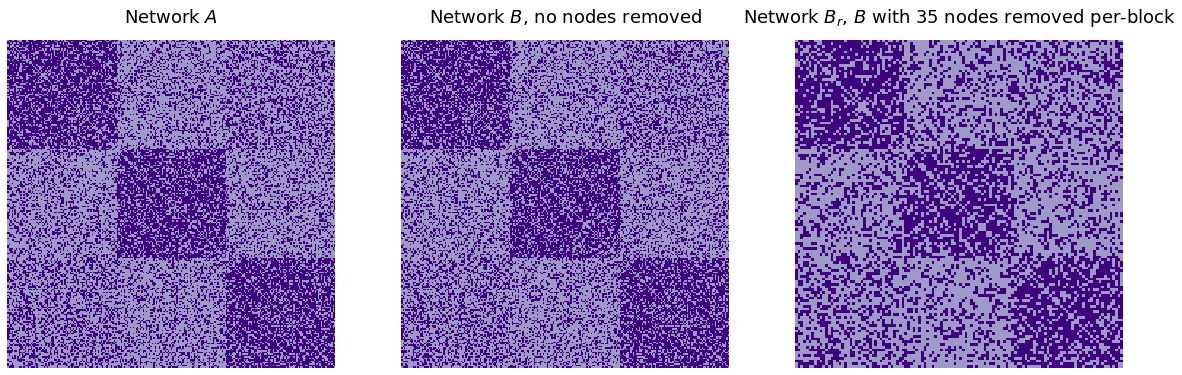

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B, B_rem]
titles=["Network $A$", "Network $B$, no nodes removed", "Network $B_r$, $B$ with 35 nodes removed per-block"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

which leaves us with a network $B_r$ and corresponding underlying random network $\mathbf B_r$ in which there are only $120$ instead of $225$ nodes. These $150$ nodes are matched to $150$ of the $225$ nodes in $A$ and $\mathbf A$, respectively. We won't shuffle $B_r$ this time, but you can trust us these techniques work if your network is shuffled, too!

Your task is to match the $150$ nodes in $B_r$ to their corresponding matched pair in $A$.

Behind the scenes, what you want to do is basically take the network $A$, and match $B$ to a *subnetwork* of $A$ which is *induced* by the nodes for which there is a corresponding matched pair. By this, what we mean is that we want to figure out which nodes in the larger network $A$ *actually have* a matched pair in $B_r$, and virtually *ignore* the other nodes entirely! In this case, the induced subnetwork of $A$ looks like this:

In [85]:
A_induced = A[nodes_to_retain,:][:,nodes_to_retain]

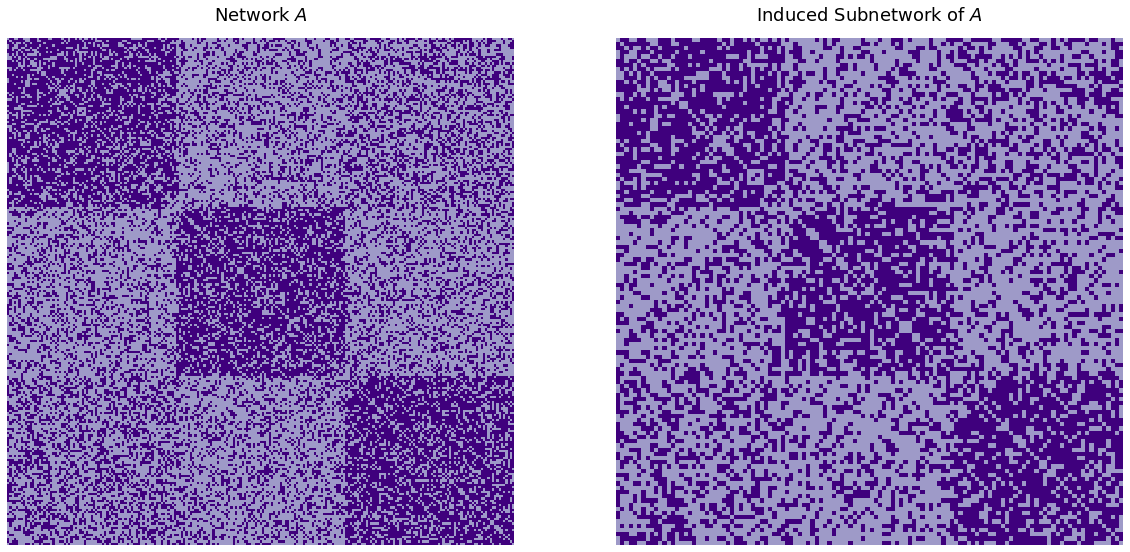

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
mtxs = [A, A_induced]
titles=["Network $A$", "Induced Subnetwork of $A$"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

### Naive Padded Graph Matching

Through naive padding, you simply add *isolated* nodes (if you remember from [Chapter 4](#link?), *isolated* nodes in a simple network are just nodes which do not have any edges in the network) to the smaller network (which is $B$, in your case), until the number of nodes in $B$ are equal to the number of nodes in $A$. The padded version of $B$ looks like this:

In [87]:
B_padded = np.pad(B_rem, [(0,nremove*n_blocks), (0, nremove*n_blocks)])

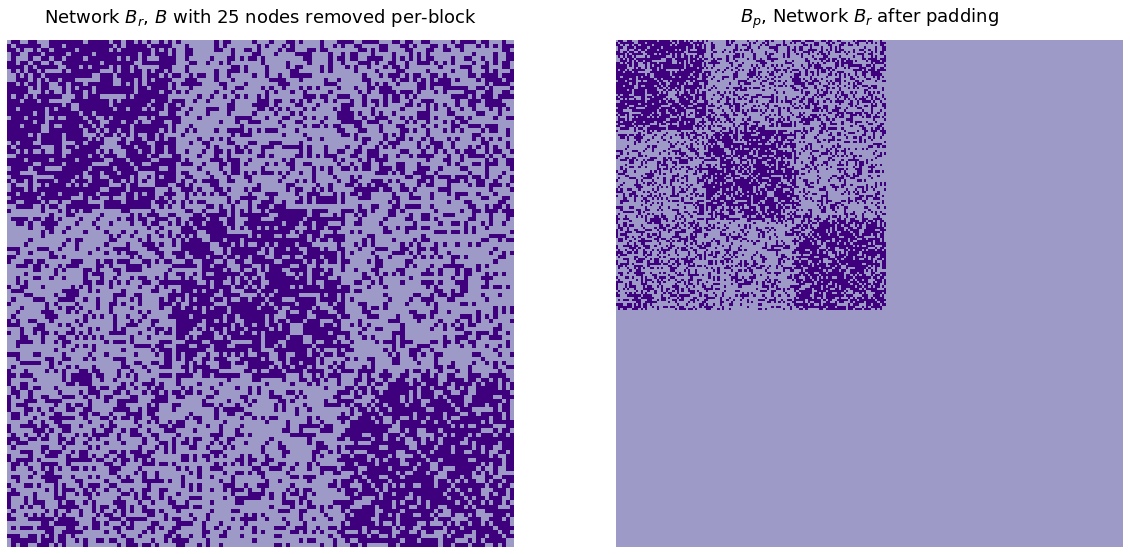

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
mtxs = [B_rem, B_padded]
titles=["Network $B_r$, $B$ with 35 nodes removed per-block", "$B_p$, Network $B_r$ after padding"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

Which makes the number of nodes in $A$ and $B_r$ the same:

In [89]:
print("Number of nodes in B, padded: {:d}".format(B_padded.shape[0]))

Number of nodes in B, padded: 225


You specify this by instantiating a `GraphMatch` object, using the argument, `padding="naive"`. Then, you re-run graph matching, optionally, using seeding, just like you did before. In our "seed generator" we built above, notice that we left an option to specify the elements we choose from manually (and not just $1:n$), by specifying the $n$ argument directly:

In [90]:
np.random.seed(1234)

nseeds_padded = 3
gmp_naive = GraphMatch(padding="naive")
# obtain which nodes of B will be the seeds to use
rem_seeds = np.random.choice(n_verts_B, size=nseeds_padded, replace=False)

# obtain seeds in A which are the indices of the retained nodes
# of the corresponding seeds in B
ref_seeds = nodes_to_retain[rem_seeds]

# run SGM with A1 and A2 with nodes removed
# since we didn't shuffle A2, the seeds are the same for both
gmp_naive = gmp_naive.fit(A, B_rem, ref_seeds, rem_seeds)

# unshuffle B using the padded version of B and the permutation identified
P_unshuffle = make_unshuffle(gmp_naive.perm_inds_)
B_unshuffle_seeds_naive = P_unshuffle.T @ B_padded @ P_unshuffle

naive_matching = gmp_naive.perm_inds_[nodes_to_retain]
match_ratio_naive = np.mean(naive_matching == np.arange(n_verts_B))
disagreements_naive = np.linalg.norm(A - B_unshuffle_seeds_naive)**2

Match Ratio, naive padding: 0.083
Disagreements, naive padding: 19748


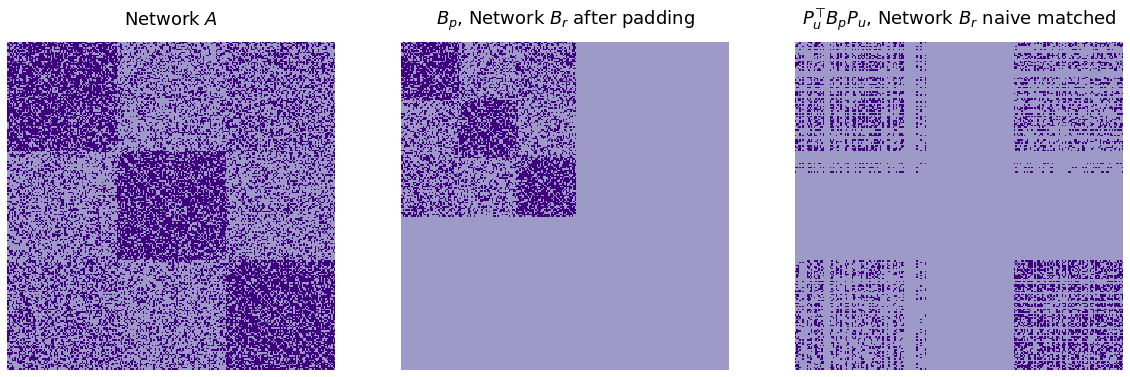

In [91]:
print("Match Ratio, naive padding: {:.3f}".format(match_ratio_naive))
print("Disagreements, naive padding: {:d}".format(int(disagreements_naive)))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B_padded, B_unshuffle_seeds_naive]
titles=["Network $A$", "$B_p$, Network $B_r$ after padding", "$P_u^\\top B_p P_u$, Network $B_r$ naive matched"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

We have managed to match some of the nodes, but the match ratio is still very low, and the number of disagreements is very high. The naive matching of $B$ after padding looks nothing like $A$ we were trying to match it to. What happened?

### Adopted Padded Graph Matching

As it turns out, when we use this naive approach for padded graph matching, we matched $B$ with the best *subnetwork* of $A$. In practice, what this means is that we took the isolated nodes of $B$ that we added (just to make the number of nodes align) and attempted to find signal in these nodes. These nodes then, in effect, ended up being aligned to low-density subnetworks of $A$, which means that we allowed nodes that didn't really exist in $B$ to still have an impact on the matching quality!

Instead, what we want to do is match $B$ to the best fitting *induced subnetwork* of $A$. The key difference is that, the ideal case, the subnetwork *induced* on $A$ is the subnetwork induced by the set of nodes which were *actually* retained by $B$, and *not* just any old subnetwork.

To do this, we use a strategy called *adopted padding*, which is performed using `padding="adopted"` for the `GraphMatch` object. Through adoptive padding, we instead perform graph matching between $\tilde A$ and a padded version of $\tilde B$, where $\tilde A = 2A$ minus a matrix of ones, and vice-versa for $\tilde B$. We again pad $\tilde B$ exactly like we did before. What this has the effect of is making it so we will *discount* the padded nodes entirely when performing our graph matching, and will allow us to find the best induced subnetwork instead. We perform this as follows:

In [92]:
gmp_adopted = GraphMatch(padding="adopted")

# run SGM with A and B with nodes removed
# since we didn't shuffle B, the seeds are the same for both
gmp_adopted = gmp_adopted.fit(A, B_rem, ref_seeds, rem_seeds)

# unshuffle B using the padded version of B and the permutation identified
P_unshuffle = make_unshuffle(gmp_adopted.perm_inds_)
B_unshuffle_seeds_adopted = P_unshuffle.T @ B_padded @ P_unshuffle

adopted_matching = gmp_adopted.perm_inds_[nodes_to_retain]
match_ratio_adopted = np.mean(adopted_matching == np.arange(n_verts_B))
disagreements_adopted = np.linalg.norm(A - B_unshuffle_seeds_adopted)**2

Match Ratio, adopted padding: 1.000
Disagreements, adopted padding: 17024


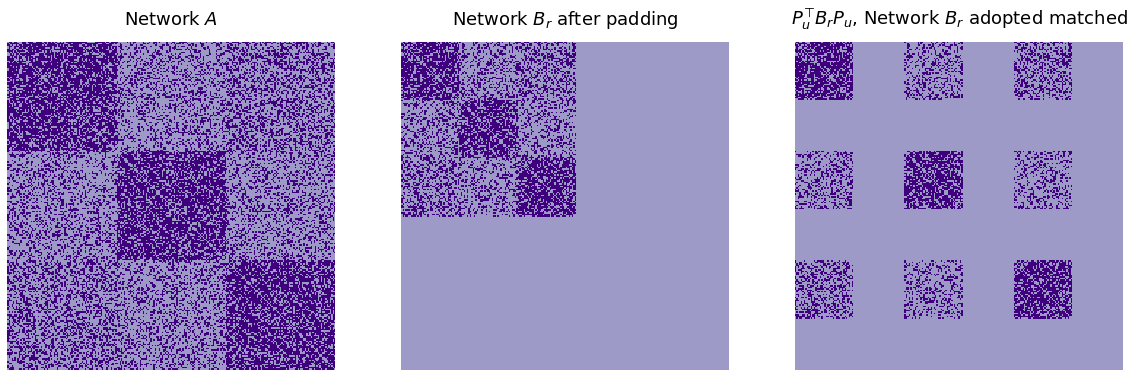

In [93]:
print("Match Ratio, adopted padding: {:.3f}".format(match_ratio_adopted))
print("Disagreements, adopted padding: {:d}".format(int(disagreements_adopted)))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, B_padded, B_unshuffle_seeds_adopted]
titles=["Network $A$", "Network $B_r$ after padding", "$P_u^\\top B_r P_u$, Network $B_r$ adopted matched"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

Using adopted matching has increased the match ratio to perfect, but the number of disagreements is *still* pretty high!

As it turns out, since we have isolated nodes in the network, a better way to view this comparison would be to look at $A$ on the *subnetwork induced* by the non-isolated nodes of $B$, and compute the number of disagreements here instead:

In [94]:
nonisolates = np.where(B_unshuffle_seeds_adopted.sum(axis=0) != 0)[0]
A_ind_by_nonisolates = A[nonisolates,:][:,nonisolates]
B_ind_by_nonis_unshuf = B_unshuffle_seeds_adopted[nonisolates,:][:,nonisolates]
disagreements_naive_nonisolates = np.linalg.norm(A_ind_by_nonisolates - B_ind_by_nonis_unshuf)**2

Disagreements, adoptive padding, non-isolates: 676


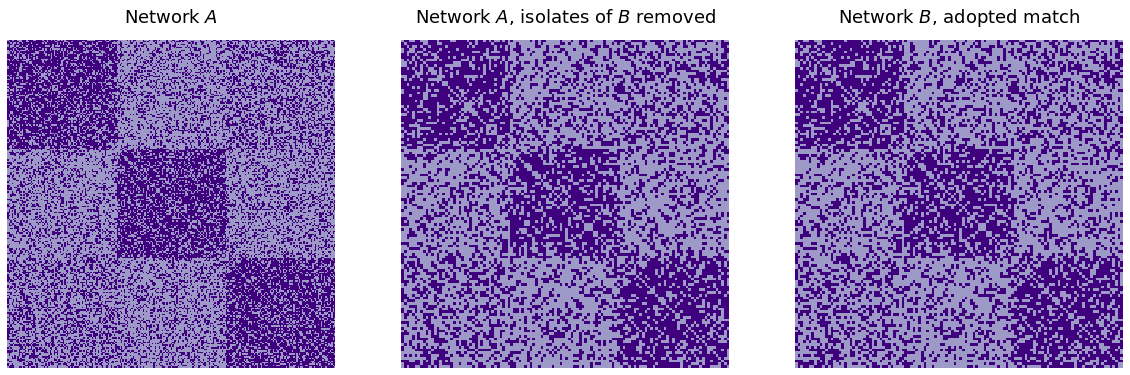

In [96]:
print("Disagreements, adoptive padding, non-isolates: {:d}".format(int(disagreements_naive_nonisolates)))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
mtxs = [A, A_ind_by_nonisolates, B_ind_by_nonis_unshuf]
titles=["Network $A$", "Network $A$, isolates of $B$ removed", "Network $B$, adopted match"]
for i, ax in enumerate(axs.flat):
    heatmap(mtxs[i], ax=ax, cbar=False, title=titles[i], cmap=cmaps["sequential"])

Which is much more reasonable.